In [1]:
import numpy as np

class MultiClassSVM:
    def __init__(self, C=1.0):
        self.C = C
        self.classifiers = []

    def hingeloss(self, w, b, x, y):
        reg = 0.5 * np.sum(w * w)
        total_loss = 0

        for i in range(x.shape[0]):
            opt_term = y[i] * ((np.dot(w, x[i])) + b)
            loss = max(0, 1 - opt_term)
            total_loss += loss

        return reg + self.C * total_loss

    def fit(self, X, Y):
        for class_label in [0, 1, 2]:
            binary_labels = np.where(Y == class_label, 1, -1)
            clf = SVM(C=self.C)
            clf.fit(X, binary_labels)
            self.classifiers.append(clf)

    def predict(self, X):
        class_predictions = np.zeros((X.shape[0], len(self.classifiers)))

        for idx, clf in enumerate(self.classifiers):
            class_predictions[:, idx] = clf.predict(X)

        # Choose the class with the highest confidence score
        predicted_labels = np.argmax(class_predictions, axis=1)
        return predicted_labels


In [2]:
class SVM:

    def __init__(self, C = 1.0):
        self.C = C
        self.w = 0
        self.b = 0

    def hingeloss(self, w, b, x, y):
        reg = 0.5 * np.sum(w * w)
        total_loss = 0
    
        for i in range(x.shape[0]):
            opt_term = y[i] * ((np.dot(w, x[i])) + b)
            loss = reg + self.C * max(0, 1 - opt_term)
        total_loss += loss
    
        return (total_loss / x.shape[0])


    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        number_of_features = X.shape[1]

        number_of_samples = X.shape[0]

        c = self.C

        ids = np.arange(number_of_samples)
        np.random.shuffle(ids)

        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        for i in range(epochs):
            
            l = self.hingeloss(w, b, X, Y)
 
            losses.append(l)
            
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                        
                            gradw += c * Y[x] * X[x]
                            gradb += c * Y[x]

                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb
        
        self.w = w
        self.b = b

        return self.w, self.b, losses

    def predict(self, X):
        
        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return np.sign(prediction)
    

In [3]:
import pandas as pd
df = pd.read_excel('output_file_tweets.xlsx')

In [4]:
df.head()

,tweets,Sentiment_Label
0,यह हक सरफ झठ क ह क वह जर स बल और वशषट बन रह कव...,neutral
1,Kurukshetra रहल गध कहत ह क हद टररजम खतरनक ह कग...,neutral
2,ManipurVoilence क बच कक महलओ क नरवसतर कर सडक प...,neutral
3,Kurukshetra I N D I A स कई इडय नह ह जत कगरस पर...,neutral
4,पढ दशबध क आलख वरष भमभण मरज मणपर क भरस जत यह अव...,positive


In [5]:
def text_to_num(x):
    if x == 'positive':
        return 2
    elif x == 'neutral':
        return 1
    else:
        return 0

In [6]:
df['sentiment_no'] = df['Sentiment_Label'].apply(text_to_num)

In [7]:
df.head()

,tweets,Sentiment_Label,sentiment_no
0,यह हक सरफ झठ क ह क वह जर स बल और वशषट बन रह कव...,neutral,1
1,Kurukshetra रहल गध कहत ह क हद टररजम खतरनक ह कग...,neutral,1
2,ManipurVoilence क बच कक महलओ क नरवसतर कर सडक प...,neutral,1
3,Kurukshetra I N D I A स कई इडय नह ह जत कगरस पर...,neutral,1
4,पढ दशबध क आलख वरष भमभण मरज मणपर क भरस जत यह अव...,positive,2


In [8]:
X = df['tweets']
Y = df['sentiment_no'].values
X

0      यह हक सरफ झठ क ह क वह जर स बल और वशषट बन रह कव...
1      Kurukshetra रहल गध कहत ह क हद टररजम खतरनक ह कग...
2      ManipurVoilence क बच कक महलओ क नरवसतर कर सडक प...
3      Kurukshetra I N D I A स कई इडय नह ह जत कगरस पर...
4      पढ दशबध क आलख वरष भमभण मरज मणपर क भरस जत यह अव...
                             ...                        
275    আলবব ৪০ চর আশরম এর চল নজর সগঠন তর করছন সগঠনর ন...
276    ফসবক পসট এবর বসফরক তণমল কগরস এর মখপতর তথ তণমল ...
277    মণপর ইসয নয এব বলক বঞচনর অভযগ BJP4India র বরদধ...
278        মণপর দডয বজপ সরকরর বরধত করর হমমত আছ অপরণ সনদর
279    দশর গনতনতর রকষর সবরথ আগম লকসভ ২০২৪ শ নরবচন একট...
Name: tweets, Length: 280, dtype: object

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state = 101)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_traincv = cv.fit_transform(x_train)
x_testcv = cv.transform(x_test)

In [11]:
x_testcv_array = x_testcv.toarray()
x_traincv_array = x_traincv.toarray()

In [12]:
model = MultiClassSVM(C=1.0)
model.fit(x_traincv_array, y_train)

In [13]:
predictions = model.predict(x_testcv_array)

In [14]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)

In [16]:
accuracy

0.8928571428571429

In [17]:
from sklearn.svm import SVC

In [18]:
classifier = SVC(kernel = 'linear', random_state = 101, C = 1.0, gamma = 'scale')

In [19]:
classifier.fit(x_traincv_array, y_train)

SVC(kernel='linear', random_state=101)

In [20]:
predicts = classifier.predict(x_testcv_array)

In [21]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [22]:
predicts

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
accurate = accuracy_score(y_test, predicts)

In [24]:
accurate

0.9107142857142857

In [25]:
class_label = ['Negative', 'Neutral', 'Positive']

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[ 0,  3,  0],
       [ 1, 49,  0],
       [ 0,  2,  1]])

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Confusion matrix')

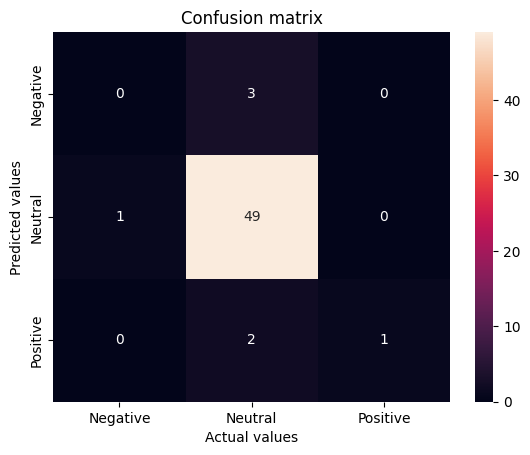

In [31]:
sns.heatmap(cm, annot = True, xticklabels = class_label, yticklabels = class_label)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix')

In [37]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [39]:
precision = precision_score(y_test, predictions, average='weighted')

In [40]:
precision

0.8790431266846361

In [41]:
recall = recall_score(y_test, predictions, average='weighted')

In [42]:
recall

0.8928571428571429

In [44]:
f1 = f1_score(y_test, predictions, average='weighted')

In [45]:
f1

0.8763002773925104